# Foundations

## Computing derivative

Derivative of a function is the rate of change of that function's output with respect to change in its input.

$\frac{df}{dx}(a) = \lim _{\Delta \to 0} \frac{f(a + \Delta) - f(a - \Delta)}{2 * \Delta}$ 

### Math symbol references

- [math symbols intro](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214)
- [Math Symbols in Markdown](https://personal.math.ubc.ca/~pwalls/math-python/jupyter/latex/)

Derivative is also referred to as the slope or the gradient. This tells us for a unit change in the input how much the output changes.

For instance, if the gradient of `f(x)` at `a` is `g`, then the function value at `f(a + 0.1)` is given by `f(a) + 0.1 * g`, (i.e) for each unit increase in the input value `a`, the output value increases by gradient times.

In [1]:
from typing import Callable

import numpy as np

In [2]:
from matplotlib  import pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
from functools import partial

In [4]:
arr = np.array([1, 2, 3, 4, 5])

# numpy adds the number to each element in the last axis
arr + 0.01

array([1.01, 2.01, 3.01, 4.01, 5.01])

In [37]:
def derivative(
    func: Callable[[np.ndarray], np.ndarray], input_: np.ndarray, delta: float = 0.001
) -> np.ndarray:
    func_result_after_delta = func(input_ + delta)
    func_result_before_delta = func(input_ - delta)
    return (func_result_after_delta - func_result_before_delta) / (2 * delta)

In [32]:
def square_function(input_: np.ndarray) -> np.ndarray:
    return np.power(input_, 2)

In [42]:
def sigmoid(input_: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-input_))

In [39]:
input_ = np.arange(1, 5, dtype=np.float32)
deriv = derivative(square_function, input_)
deriv

array([2.000004 , 3.9999483, 5.9995646, 7.9998965], dtype=float32)

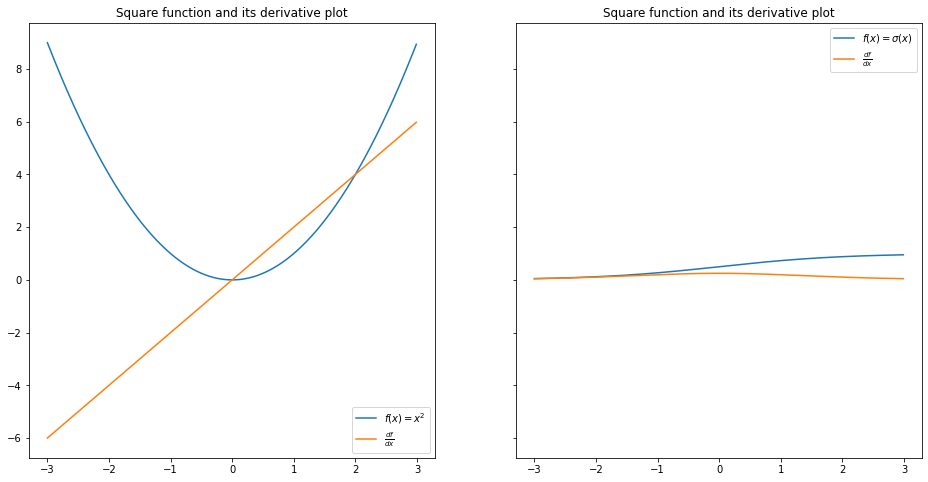

In [44]:
input_ = np.arange(-3, 3, 0.01) # to get a smooth curve

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))

# square function
ax[0].plot(input_, square_function(input_))
ax[0].plot(input_, derivative(square_function, input_))
ax[0].set_title("Square function and its derivative plot")
# In labels and legend, we can write math equations using latex
ax[0].legend(["$f(x)=x^{2}$", "$\\frac{df}{dx}$"])

# sigmoid
ax[1].plot(input_, sigmoid(input_))
ax[1].plot(input_, derivative(sigmoid, input_))
ax[1].set_title("Sigmoid function and its derivative plot")

ax[1].legend(["$f(x)=\\sigma({x})$", "$\\frac{df}{dx}$"])


In [8]:
deriv = derivative(partial(np.add, 10), input_)
deriv

array([1., 1., 1., 1.], dtype=float32)

## Chaining functions

Chaining functions is mathematically referred to as composition of functions. The outputof the nested function is fed as input to the enclosing function.

$f(x) = x + 5, g(x) = x + 10, 
g(f(x)) = (x + 5) + 10 = x + 15 $

In [9]:
from typing import List

In [10]:
FunctionTransformation = Callable[[np.ndarray], np.ndarray]

In [11]:
from functools import reduce

In [12]:
def chain_functions(
    chain: List[FunctionTransformation], input_: np.ndarray
) -> np.ndarray:
    return reduce(lambda i, f: f(i), chain, input_)

In [13]:
# Try g(x) = x^2 and f(g(x)) = g(x) + 10
chain: List[FunctionTransformation] = [np.square, partial(np.add, 10)]

input_ = np.arange(1, 5)
chain_functions(chain, input_)

array([11, 14, 19, 26])

## Chain rule

Using chain rule we can calculate the derivate of the composite functions.

$f_{2}'(x) = f_{2}'(f_{1}(x)) * f_{1}'(x) $


In [14]:
def composite_derivative(
    chain: List[FunctionTransformation], input_: np.ndarray
) -> float:
    deriv = np.full_like(input_, 1, dtype=input_.dtype.type)
    print(deriv)

    for f in chain:
        deriv *= derivative(f, input_)
        print(deriv)
        input_ = f(input_)
        print(input_)
    return deriv

In [15]:
chain: List[FunctionTransformation] = [np.square, partial(np.add, 10)]

input_ = np.arange(1, 5, dtype=np.float32)
composite_derivative(chain, input_)

[1. 1. 1. 1.]
[2. 4. 6. 8.]
[ 1.  4.  9. 16.]
[2. 4. 6. 8.]
[11. 14. 19. 26.]


array([2., 4., 6., 8.], dtype=float32)

## Functions with multiple inputs

In [16]:
def multiple_input_function(
    x: np.ndarray, y: np.ndarray, func: Callable[[np.ndarray, np.ndarray], np.ndarray]
) -> np.ndarray:
    """
    Computes f(x,y)
    """
    assert x.shape == y.shape
    return func(x, y)

In [17]:
def sigmoid(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-(x + y)))

In [18]:
multiple_input_function(np.arange(1, 6), np.array([11, 12, 13, 14, 15]), sigmoid)

array([0.99999386, 0.99999917, 0.99999989, 0.99999998, 1.        ])

## Derivatives of functions with multiple inputs

Let us name the functions, `a = x + y` and `s = sigmoid(a)`. then derivative of `s` with respect to `x` and `y` are given by `ds/dx = ds/da * da/dx`, `ds/dy = ds/da * da/dy`. This notation is easier to understand and remember.